## Installs and Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

## EDA

In [39]:
df = pd.read_csv('data/Mall_Customers.csv')

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Visualization

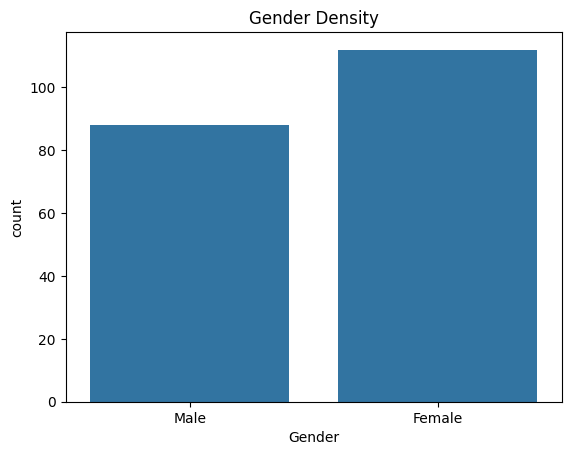

In [7]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Density')
plt.show()

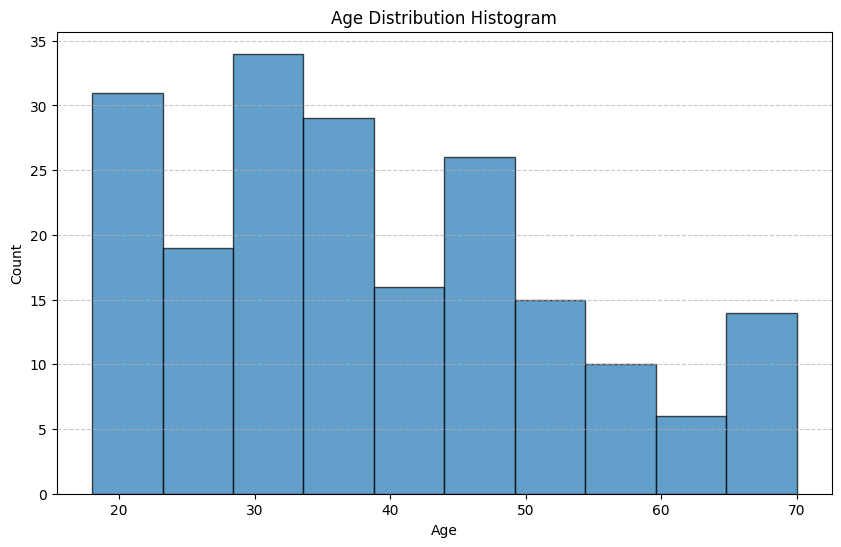

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], edgecolor='black', alpha=0.7)
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

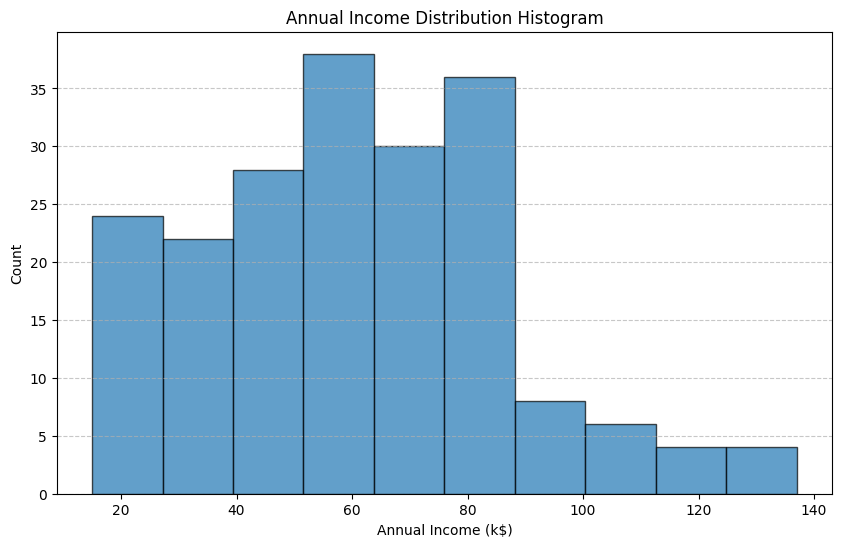

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['Annual Income (k$)'], edgecolor='black', alpha=0.7)
plt.title('Annual Income Distribution Histogram')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

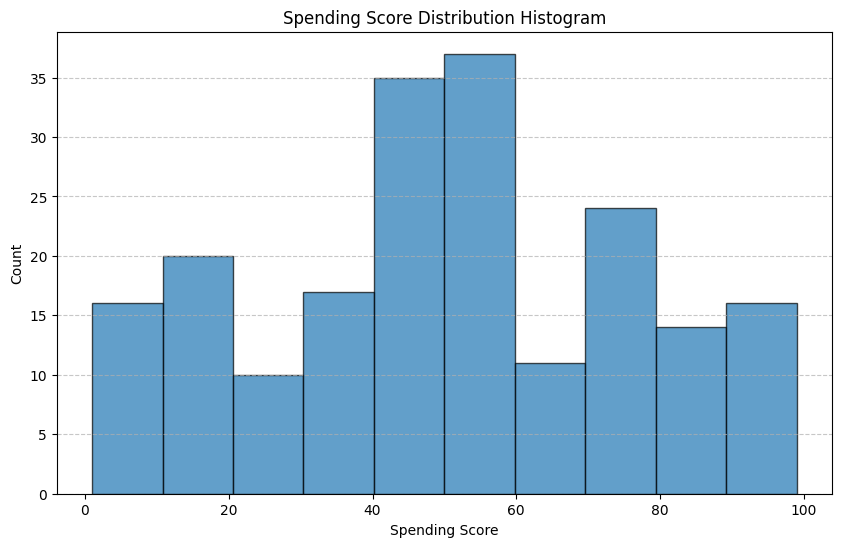

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(df['Spending Score (1-100)'], edgecolor='black', alpha=0.7)
plt.title('Spending Score Distribution Histogram')
plt.xlabel('Spending Score')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## K-Means Classification ($k = 3$)

In [62]:
km_3 = KMeans(n_clusters=3)

In [63]:
y_predicted = km_3.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Cluster Num (k=3)'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Num (k=3)
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


## Clusters Visualization

In [64]:
df0 = df[df['Cluster Num (k=3)'] == 0]
df1 = df[df['Cluster Num (k=3)'] == 1]
df2 = df[df['Cluster Num (k=3)'] == 2]

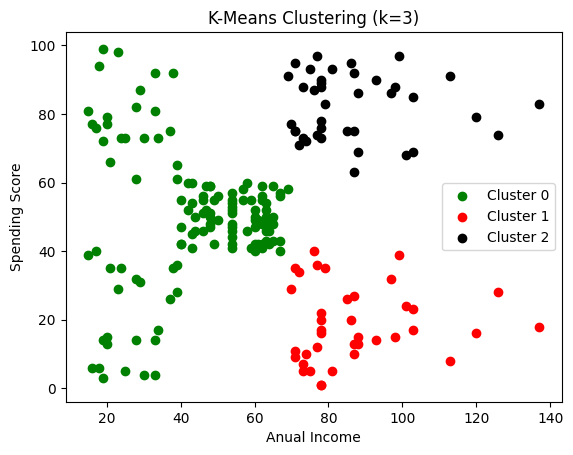

In [65]:
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], color='green')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='red')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='black')

plt.title('K-Means Clustering (k=3)')
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])

## Classification Improvement

We can consider different vaues of $k$, and find the best among these values, and do classification based on that.

#### Find Besk $k$

In [37]:
ks = range(1, 10)
sse = []

for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)

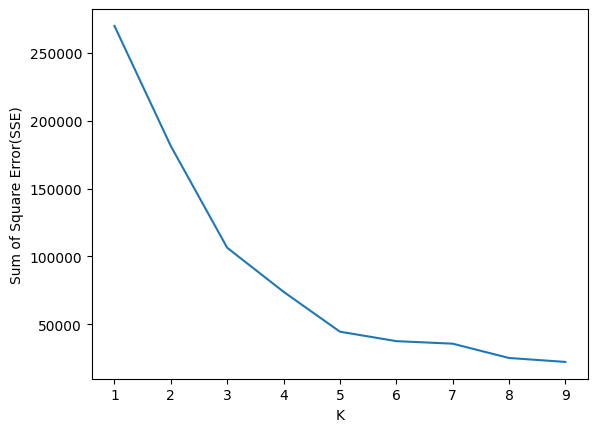

In [38]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error(SSE)')
plt.plot(ks, sse)

It seems after $k = 5$, improvement becomes less significant, compared to $k$'s less than or equal to $5$.

#### K-Means Classification ($k = 5$)

In [100]:
km_5 = KMeans(n_clusters=5)

In [101]:
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Cluster Num (k=5)'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Num (k=3),Cluster Num (k=5)
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,0,6
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,0,6
4,5,Female,31,17,40,0,3


#### Clusters Visualization

In [102]:
df0 = df[df['Cluster Num (k=5)'] == 0]
df1 = df[df['Cluster Num (k=5)'] == 1]
df2 = df[df['Cluster Num (k=5)'] == 2]
df3 = df[df['Cluster Num (k=5)'] == 3]
df4 = df[df['Cluster Num (k=5)'] == 4]

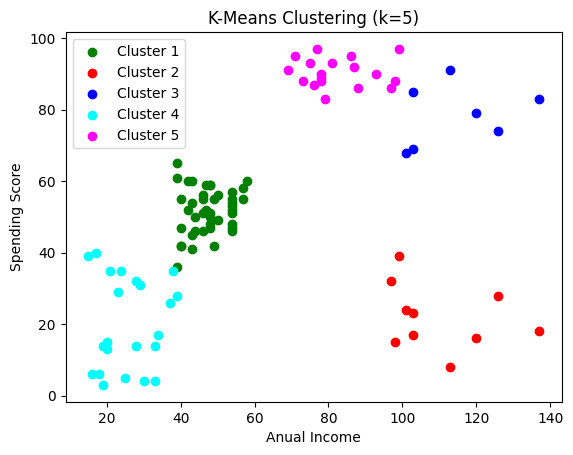

In [104]:
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], color='green')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='red')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='blue')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='cyan')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='magenta')

plt.title('K-Means Clustering (k=5)')
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])